In [94]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
from sklearn import svm
%matplotlib inline
sns.set()
sns.set_style('white')

In [95]:
data1 = loadmat('ex7data2.mat')
x = data1['X']
initialCentroid = np.array([[3, 3], [6, 2], [8, 5]])

In [96]:
def distance(data1, data2):
    return np.power(np.sum(np.power(data1 - data2, 2)), 1 / 2)

In [97]:
def findingClosestCentroids (x, centroids):
    Ci = []
    for number1 in range(len(x)):
        distances = []
        for number2 in range(len(centroids)):
            distances.append(distance(x[number1], centroids[number2]))
        Ci.append(np.argmin(distances) + 1)
    return np.array(Ci), np.c_[x, Ci]

In [98]:
def computingCentroidMeans (XCi, k):
    seperateArray = []
    Mu = []
    for number in range(k):
        seperateArray.append(XCi[np.ix_(XCi[:, XCi.shape[1] - 1] == number + 1, np.array([True, True, False]))])
    seperateArray = np.array(seperateArray)
    for number in seperateArray:
        Mu.append(sum(number) / len(number))
    return Mu

In [99]:
def plotData(x, centroids, idxs = None):
    
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    
    #assert x[0].shape == centroids[0].shape
    #assert centroids[-1].shape[0] <= len(colors)

    #If idxs is supplied, divide up X into colors
    if idxs is not None:
        assert idxs.shape[0] == x.shape[0]
        subX = []
        for number in range(1, 4):
            subX.append(np.array([x[i] for i in range(x.shape[0]) if idxs[i] == number]))
    else:
        subX = [x]
        
    fig = plt.figure(figsize = (7,5))
    for number in range(len(subX)):
        newX = subX[number]
        plt.plot(newX[:, 0], newX[:, 1], 'o', color = colors[number], alpha=0.75, label='Data Points: Cluster {}'.format(number))
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.title('Plot of X Points', fontsize=16)
    plt.grid(True)
        
    #Drawing a history of centroid movement
    if len(centroids) == 3:
        plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'r', marker = 'x')
    else:
        for centroid in centroids:
            plt.scatter(centroid[:, 0], centroid[:, 1], s = 100, c = 'r', marker = 'x')

    leg = plt.legend(loc=4, framealpha=0.5)

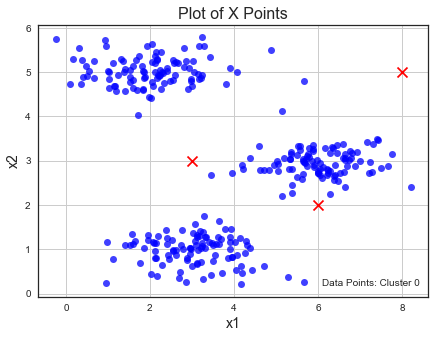

In [100]:
plotData(x, initialCentroid)

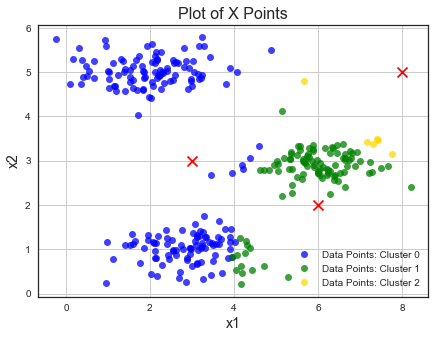

In [101]:
idxs = findingClosestCentroids(x, initialCentroid)[0]
plotData(x, initialCentroid, idxs)

In [102]:
def runningKMeans (x, initialcentroids, k, numberofIters):
    previosCentroids = []
    currentCentroids = initialcentroids
    for number in range(numberofIters):
        previosCentroids.append(currentCentroids)
        XCi = findingClosestCentroids(x, currentCentroids)[1]
        idxs = findingClosestCentroids(x, currentCentroids)[0]
        currentCentroids = np.array(computingCentroidMeans (XCi, k))
    return idxs, np.array(previosCentroids)

In [109]:
idxs, previosCentroids = runningKMeans(x, initialCentroid, 3, 10)

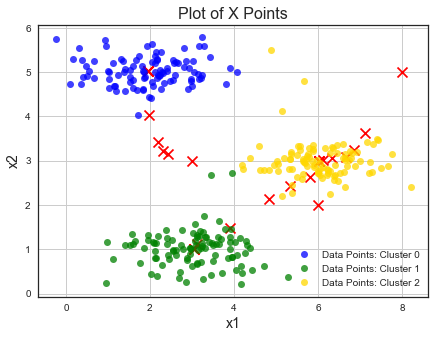

In [104]:
plotData(x, previosCentroids, idxs)
plt.plot()